In [71]:
import numpy as np
import pandas as pd

In [72]:
crop = pd.read_csv("Crop_recommendation1.csv")
crop.head()

,temperature,humidity,soilmoisture,label
0,20.879744,82.002744,202.935536,rice
1,21.770462,80.319644,226.655537,rice
2,23.004459,82.320763,263.964248,rice
3,26.491096,80.158363,242.864034,rice
4,20.130175,81.604873,262.717340,rice


In [73]:
crop.shape

(2200, 4)

In [74]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temperature   2200 non-null   float64
 1   humidity      2200 non-null   float64
 2   soilmoisture  2200 non-null   float64
 3   label         2200 non-null   object 
dtypes: float64(3), object(1)
memory usage: 68.9+ KB


In [75]:
crop.isnull().sum()

temperature     0
humidity        0
soilmoisture    0
label           0
dtype: int64

In [76]:
crop.duplicated().sum()

0

In [77]:
crop.describe()

,temperature,humidity,soilmoisture
count,2200.000000,2200.000000,2200.000000
mean,25.616244,71.481779,103.463655
std,5.063749,22.263812,54.958389
min,8.825675,14.258040,20.211267
25%,22.769375,60.261953,64.551686
50%,25.598693,80.473146,94.867624
75%,28.561654,89.948771,124.267508
max,43.675493,99.981876,298.560117


In [78]:
corr=crop.drop(['label'],axis=1).corr()
corr

,temperature,humidity,soilmoisture
temperature,1.000000,0.205320,-0.030084
humidity,0.205320,1.000000,0.094423
soilmoisture,-0.030084,0.094423,1.000000


<Axes: >

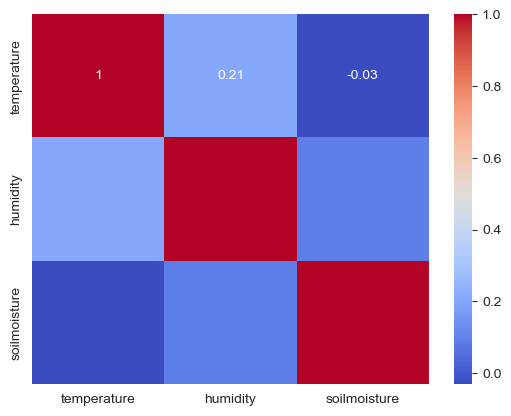

In [79]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [80]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

/var/folders/bf/pwcv68516m7fh8r21_401c7h0000gn/T/ipykernel_31617/585367431.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['temperature'])
/Users/manubolugangavasudha/.conda/envs/pythonProject/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/manubolugangavasudha/.conda/envs/pythonProject/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

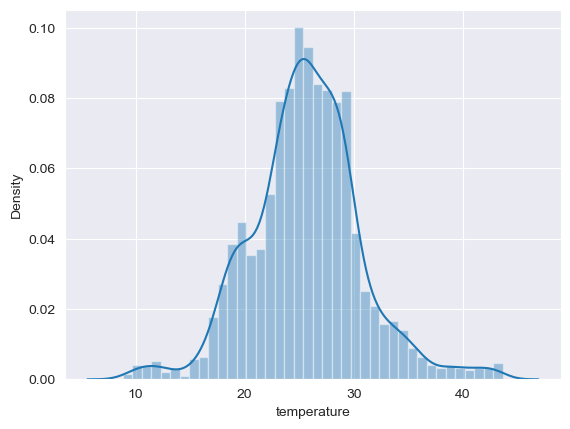

In [81]:
import matplotlib.pyplot as plt
sns.distplot(crop['temperature'])
plt.show()

In [82]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [83]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [84]:
# crop.drop(['label'],axis=1,inplace=True)
crop.head()

,temperature,humidity,soilmoisture,label,crop_num
0,20.879744,82.002744,202.935536,rice,1
1,21.770462,80.319644,226.655537,rice,1
2,23.004459,82.320763,263.964248,rice,1
3,26.491096,80.158363,242.864034,rice,1
4,20.130175,81.604873,262.717340,rice,1


In [85]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [86]:
X

,temperature,humidity,soilmoisture
0,20.879744,82.002744,202.935536
1,21.770462,80.319644,226.655537
2,23.004459,82.320763,263.964248
3,26.491096,80.158363,242.864034
4,20.130175,81.604873,262.717340
...,...,...,...
2195,26.774637,66.413269,177.774507
2196,27.417112,56.636362,127.924610
2197,24.131797,67.225123,173.322839
2198,26.272418,52.127394,127.175293


In [87]:
y.shape

(2200,)

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
X_train.shape

(1760, 3)

In [91]:
X_test.shape

(440, 3)

In [92]:
X_train

,temperature,humidity,soilmoisture
1656,16.396243,92.181519,102.944161
752,27.543848,69.347863,69.408782
892,27.521856,63.132153,45.208411
1041,25.360592,75.031933,116.553145
1179,35.474783,47.972305,97.790725
...,...,...,...
1638,21.213070,91.353492,112.983436
1095,27.359116,84.546250,90.812505
1130,27.920633,51.779659,100.258567
1294,13.429886,80.066340,71.400430


In [93]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [94]:
X_train

array([[0.21723408, 0.9089898 , 0.29685161],
       [0.53710965, 0.64257946, 0.17630752],
       [0.53647858, 0.57005802, 0.08931844],
       ...,
       [0.54792131, 0.43760347, 0.28719815],
       [0.1321158 , 0.76763665, 0.18346657],
       [0.43458302, 0.56099735, 0.11879596]])

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [96]:
X_train

array([[-1.80469186,  0.93658618,  0.0051497 ],
       [ 0.38599999, -0.10047048, -0.60529057],
       [ 0.38167811, -0.38277499, -1.04580687],
       ...,
       [ 0.46004447, -0.89838138, -0.04373582],
       [-2.38763079,  0.38634019, -0.56903684],
       [-0.31616132, -0.41804549, -0.89653148]])

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.7136363636363636
Naive Bayes  with accuracy : 0.9022727272727272
Support Vector Machine  with accuracy : 0.8409090909090909
K-Nearest Neighbors  with accuracy : 0.8477272727272728
Decision Tree  with accuracy : 0.9022727272727272
Random Forest  with accuracy : 0.9068181818181819
Bagging  with accuracy : 0.9
AdaBoost  with accuracy : 0.10909090909090909
Gradient Boosting  with accuracy : 0.9022727272727272
Extra Trees  with accuracy : 0.7636363636363637


In [98]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9068181818181819

In [99]:
def recommendation(temperature,humidity,soilmoisture):
    features = np.array([[temperature,humidity,soilmoisture]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [100]:
temperature = 40.0
humidity = 20
soilmoisture = 100

predict = recommendation(temperature,humidity,soilmoisture)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Maize is a best crop to be cultivated 


In [101]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))